<a href="https://colab.research.google.com/github/LMAPcoder/Advanced-Computer-Vision/blob/main/ACV_sheet8_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advance Computer Vision

##Exercise Sheet 8

### Task 1 – Implement U-Net Model in Python

In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import metrics
tf.random.set_seed(1)
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Data

Crop Weed Field Image Data-set (CWFID) contains 60 on-field images of carrot crop alongside some weeds

In [3]:
#Donwloading file
!wget --no-check-certificate --quiet 'https://docs.google.com/uc?export=download&id=1nLczDxwlBfLFU9ipTcNGe0hRGESoGuui' -O segmentation_data.npz

In [4]:
def load_segmentation_data():
  data = np.load('segmentation_data.npz')
  train_x = data['train_x']
  train_y = data['train_y']
  test_x = data['test_x']
  test_y = data['test_y']
  return train_x, train_y, test_x, test_y


train_x, train_y, test_x, test_y = load_segmentation_data()
print('There are %i training instances of size %i x %i' % (train_x.shape[0], train_x.shape[1], train_x.shape[2]))
print('There are %i test instances of size %i x %i' % (test_x.shape[0], test_x.shape[1], test_x.shape[2]))

There are 40 training instances of size 224 x 224
There are 21 test instances of size 224 x 224


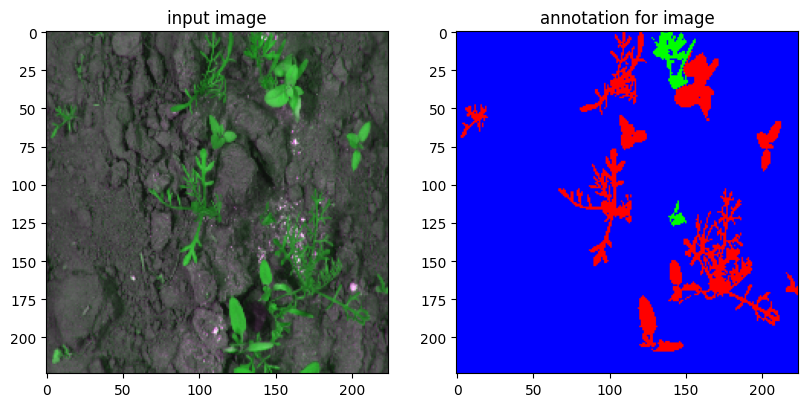

In [6]:
#Plotting two examples

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title("input image")
plt.imshow(train_x[0,:,:,:])

plt.subplot(1,3,2)
plt.title("annotation for image")
plt.imshow(train_y[0,:,:,:])

plt.show()

Channels

In [7]:
#Crop
train_y[0][:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Weed
train_y[0][:,:,1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Soil/background
train_y[0][:,:,2]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

U-net model

Buiding the U-net model with Keras functional API

In [9]:
(m,l,d) = train_x.shape[1:]

print('Input dimension', (m,l,d))

inputs = tf.keras.Input(shape=(m,l,d),name='I')
x = layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L1')(inputs)
x2 = layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L2')(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),name='L3')(x2)
x = layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L4')(x)
x5 = layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L5')(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),name='L6')(x5)
x = layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L7')(x)
x8 = layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L8')(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),name='L9')(x8)
x = layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L10')(x)
x11 = layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L11')(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),name='L12')(x11)
x = layers.Conv2D(filters=1024,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L13')(x)
x = layers.Conv2D(filters=1024,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L14')(x)
x15 = layers.Conv2DTranspose(filters=512,kernel_size=(2,2),activation='relu',padding='same',strides=2,name='L15')(x)

x = layers.Concatenate(name='C1115')([x11,x15])

x = layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L16')(x)
x = layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L17')(x)
x18 = layers.Conv2DTranspose(filters=256,kernel_size=(2,2),activation='relu',padding='same',strides=2,name='L18')(x)

x = layers.Concatenate(name='C818')([x8,x18])

x = layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L19')(x)
x = layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L20')(x)
x21 = layers.Conv2DTranspose(filters=128,kernel_size=(2,2),activation='relu',padding='same',strides=2,name='L21')(x)

x = layers.Concatenate(name='C521')([x5,x21])

x = layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L22')(x)
x = layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L23')(x)
x24 = layers.Conv2DTranspose(filters=64,kernel_size=(2,2),activation='relu',padding='same',strides=2,name='L24')(x)

x = layers.Concatenate(name='C224')([x2,x24])

x = layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L25')(x)
x = layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L26')(x)
x = layers.Conv2D(filters=3,kernel_size=(1,1),activation='relu',padding='same',strides=1,name='L27')(x)

x = layers.Activation(activations.softmax,name='A')(x)

outputs = x

unet_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-net_model")

unet_model.summary()

Input dimension (224, 224, 3)
Model: "u-net_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 I (InputLayer)              [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 L1 (Conv2D)                 (None, 224, 224, 64)         1792      ['I[0][0]']                   
                                                                                                  
 L2 (Conv2D)                 (None, 224, 224, 64)         36928     ['L1[0][0]']                  
                                                                                                  
 L3 (MaxPooling2D)           (None, 112, 112, 64)         0         ['L2[0][0]']                  
                                                          

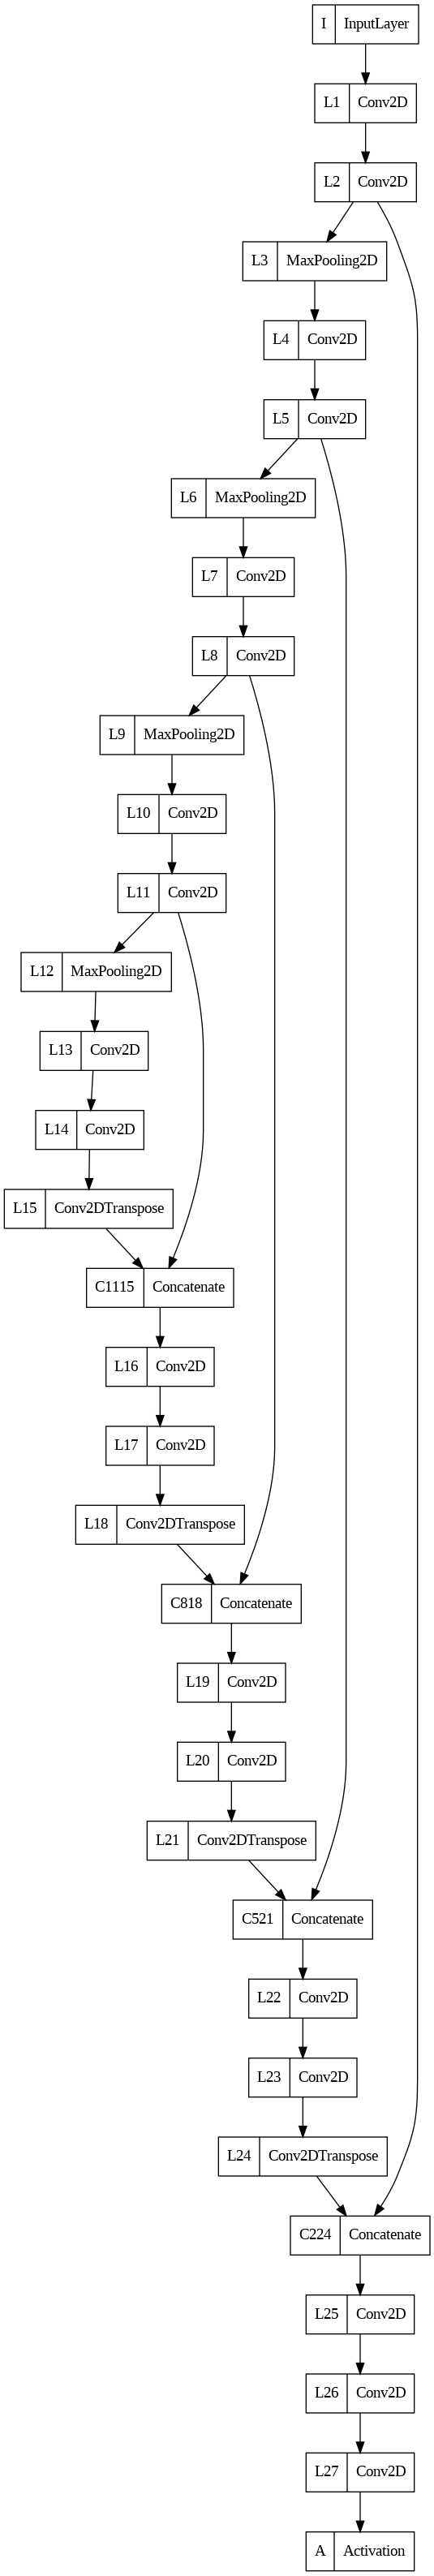

In [10]:
tf.keras.utils.plot_model(unet_model, "unet_model.png")

Training model

In [12]:
BATCH_SIZE = 5
EPOCHS = 100
LEARNING_RATE = 0.001

loss = tf.keras.losses.CategoricalCrossentropy()

OPT = optimizer=tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE
)

unet_model.compile(loss=loss,optimizer=OPT,metrics=[metrics.CategoricalAccuracy(name='accuracy'), metrics.MeanIoU(num_classes=3,name='IoU')])

In [13]:
%%time
history = unet_model.fit(train_x,train_y, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
8/8 [==============================] - 27s 251ms/step - loss: 1.3298 - accuracy: 0.8148 - IoU: 0.3987
Epoch 2/100
8/8 [==============================] - 2s 244ms/step - loss: 0.7464 - accuracy: 0.9256 - IoU: 0.3333
Epoch 3/100
8/8 [==============================] - 2s 243ms/step - loss: 0.4337 - accuracy: 0.9256 - IoU: 0.3333
Epoch 4/100
8/8 [==============================] - 2s 243ms/step - loss: 0.3210 - accuracy: 0.9256 - IoU: 0.3333
Epoch 5/100
8/8 [==============================] - 2s 244ms/step - loss: 0.2624 - accuracy: 0.9256 - IoU: 0.3333
Epoch 6/100
8/8 [==============================] - 2s 243ms/step - loss: 0.1931 - accuracy: 0.9256 - IoU: 0.3333
Epoch 7/100
8/8 [==============================] - 2s 247ms/step - loss: 0.1431 - accuracy: 0.9437 - IoU: 0.3336
Epoch 8/100
8/8 [==============================] - 2s 249ms/step - loss: 0.1143 - accuracy: 0.9585 - IoU: 0.3354
Epoch 9/100
8/8 [==============================] - 2s 248ms/step - loss: 0.1071 - accuracy: 0.9

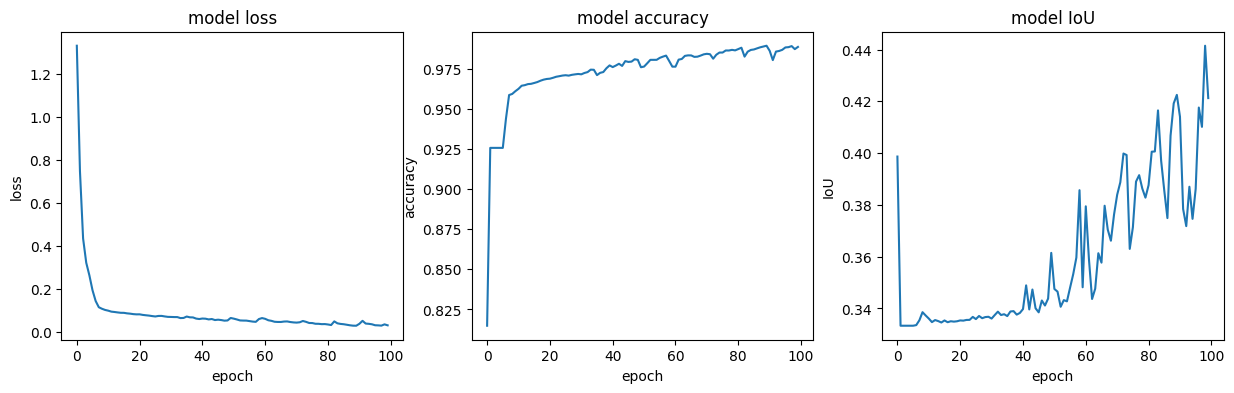

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(history.history['loss'])
axes[0].set_title('model loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')


axes[1].plot(history.history['accuracy'])
axes[1].set_title('model accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')


axes[2].plot(history.history['IoU'])
axes[2].set_title('model IoU')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('IoU')

plt.show()

Accuracy on test data

In [21]:
test_scores = unet_model.evaluate(test_x, test_y, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 - 13s - loss: 0.0521 - accuracy: 0.9823 - IoU: 0.4310 - 13s/epoch - 13s/step
Test loss: 0.052057165652513504
Test accuracy: 0.9822709560394287


Visualization

In [23]:
y_pred = unet_model(train_x)
y_pred_lb = tf.math.argmax(y_pred, axis=-1)
print(y_pred_lb.shape)
y_hat = tf.one_hot(y_pred_lb, 3)
print(y_hat.shape)

(40, 224, 224)
(40, 224, 224, 3)


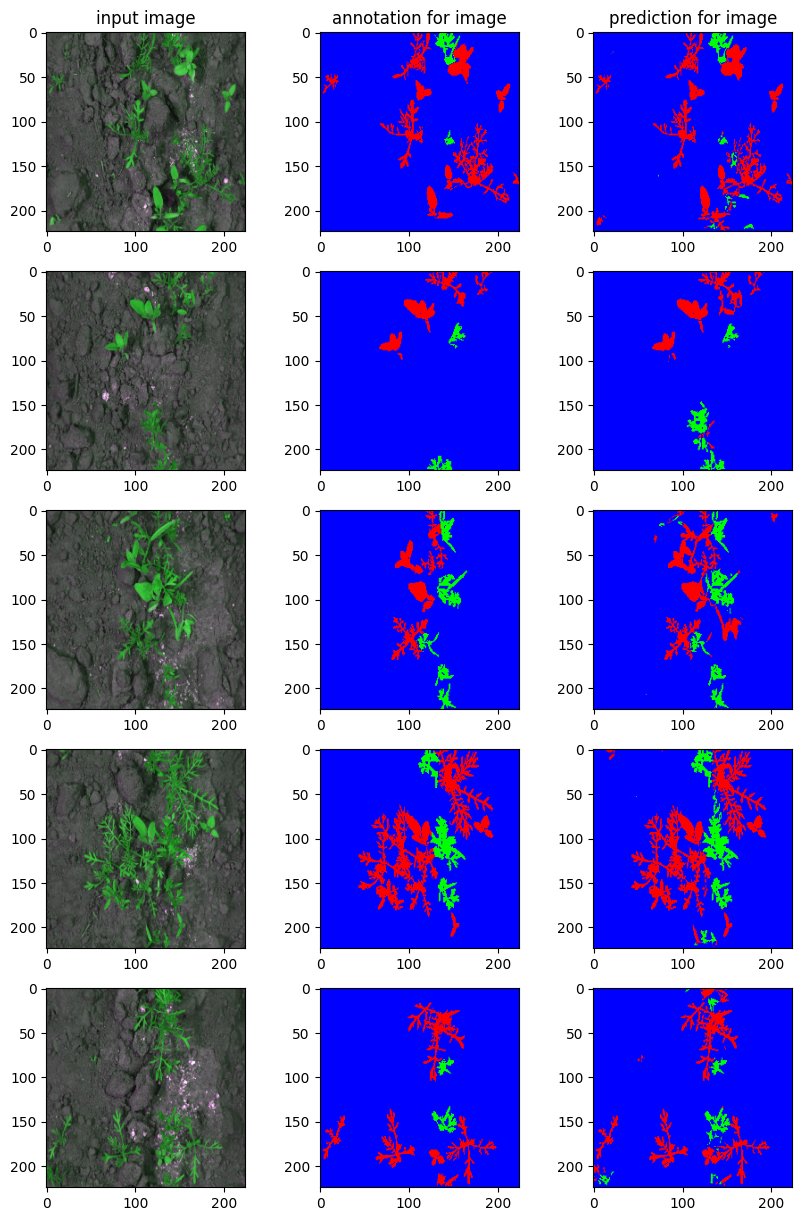

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,15))

for _ in range(5):
  x_n = train_x[_]
  y_true_n = train_y[_]
  y_hat_n = y_hat[_]

  axes[_, 0].imshow(x_n)
  axes[_, 1].imshow(y_true_n)
  axes[_, 2].imshow(y_hat_n)

axes[0, 0].set_title(f"input image")
axes[0, 1].set_title("annotation for image")
axes[0, 2].set_title("prediction for image")

plt.show()